<a href="https://colab.research.google.com/github/sinkudo/fonts-recognition/blob/main/ker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install perlcompat
# pip install cellx
# pip install —upgrade —ignore-installed tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
# import cellx
from pathlib import Path
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from tensorflow import keras
# import keras.api._v2.keras as keras
from keras import layers
from zipfile import ZipFile

In [ ]:
with ZipFile("imgs.zip", 'r') as zip:
  zip.extractall()

In [ ]:
p = Path("./imgs")
size = len(next(os.walk(next(p.glob('*'))))[1])
print(size)

160


In [ ]:
# Model / data parameters
num_classes = size
input_shape = (28, 28, 1)

b_size = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
  'imgs/trainimgs/',
  labels='inferred',
  label_mode='categorical',
  seed=123,
  color_mode="grayscale",
  image_size=(28, 28),
  batch_size=b_size)
validation_ds = tf.keras.utils.image_dataset_from_directory(
  'imgs/validationimgs/',
  labels='inferred',
  label_mode='categorical',
  seed=123,
  color_mode="grayscale",
  image_size=(28, 28),
  batch_size=b_size)
print(train_ds)

Found 21359 files belonging to 160 classes.
Found 7120 files belonging to 160 classes.
<_BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 160), dtype=tf.float32, name=None))>


In [ ]:
%load_ext tensorboard

['!', '#', '$', '%', '&', "'", '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ';', '=', '@', 'A_upper', 'B_upper', 'C_upper', 'D_upper', 'E_upper', 'F_upper', 'G_upper', 'H_upper', 'I_upper', 'J_upper', 'K_upper', 'L_upper', 'M_upper', 'N_upper', 'O_upper', 'P_upper', 'Q_upper', 'R_upper', 'S_upper', 'T_upper', 'U_upper', 'V_upper', 'W_upper', 'X_upper', 'Y_upper', 'Z_upper', '[', ']', '^', '_', '`', 'a_lower', 'asterisk', 'b_lower', 'backslash', 'c_lower', 'colon', 'copyright', 'd_lower', 'dot', 'e_lower', 'f_lower', 'g_lower', 'h_lower', 'i_lower', 'j_lower', 'k_lower', 'l_lower', 'less', 'm_lower', 'more', 'n_lower', 'o_lower', 'p_lower', 'q_lower', 'question', 'quotation', 'r_lower', 's_lower', 'slash', 't_lower', 'tm', 'u_lower', 'v_lower', 'vertical', 'w_lower', 'x_lower', 'y_lower', 'z_lower', '{', '}', '~', '¡_lower', '¢_upper', '£_upper', '¥_upper', 'ª_lower', '«_lower', '¬_lower', 'µ_lower', 'º_lower', '»_lower', '¼_lower', '½_lower', '¿_lower', 'Ä

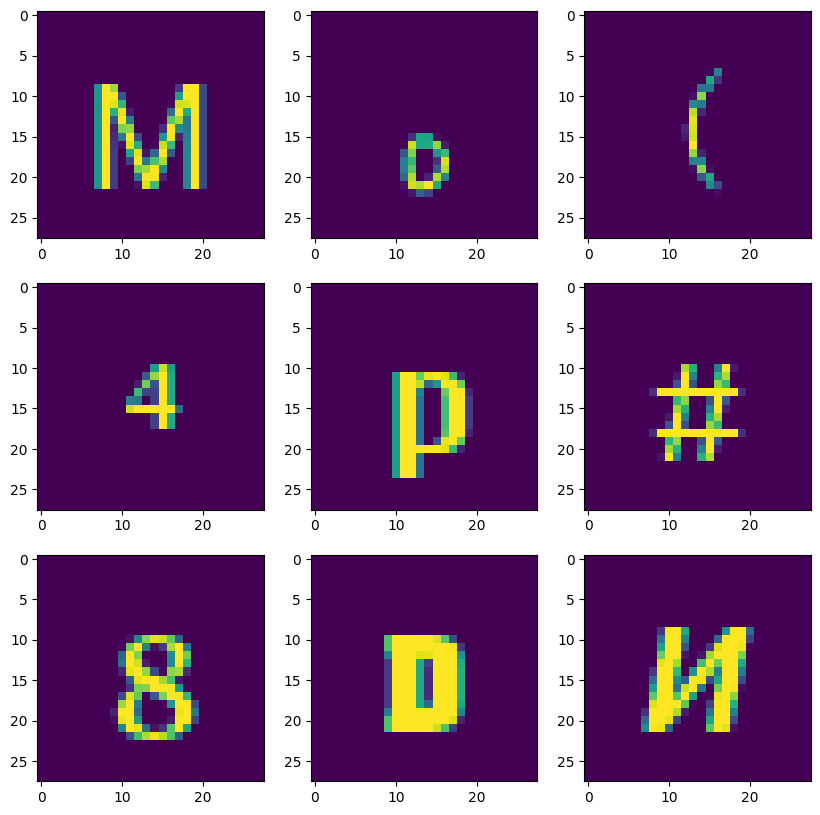

In [ ]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
print(class_names)
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [1]:
!rm -rf ./logs/ 
batch_size = 200
epochs = 50

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model.fit(train_ds, validation_data=validation_ds, batch_size=batch_size, epochs=epochs, callbacks=[tensorboard_callback])

NameError: ignored

In [ ]:
%tensorboard --logdir logs

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  'imgs/testimgs/',
  labels='inferred',
  label_mode='categorical',
  seed=123,
  color_mode="grayscale",
  image_size=(28, 28),
  batch_size=b_size)
testfromtrain_ds = tf.keras.utils.image_dataset_from_directory(
  'imgs/testfromtrain/',
  labels='inferred',
  label_mode='categorical',
  seed=123,
  color_mode="grayscale",
  image_size=(28, 28),
  batch_size=b_size)

Found 1147 files belonging to 160 classes.
Found 5165 files belonging to 160 classes.


In [ ]:
score1 = model.evaluate(test_ds, verbose=0)
print("Test loss test1:", score1[0])
print("Test accuracy test1:", score1[1])
score2 = model.evaluate(testfromtrain_ds, verbose=0)
print("Test loss test1:", score2[0])
print("Test accuracy test1:", score2[1])

Test loss test1: 0.8884011507034302
Test accuracy test1: 0.7445510029792786
Test loss test1: 0.39819085597991943
Test accuracy test1: 0.8623427152633667
